In [ ]:
!pip install requests
!pip install bs4
!pip install matplotlib
import requests
from bs4 import BeautifulSoup as bs

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=32cbd05bd927a279723b19229fad1363c99e293d6ddc45379246d53c9199d5f5
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
response= requests.get('https://www.nykaa.com/luxe/skin/c/2871?page_no=1&sort=popularity&ptype=lst&id=2871&root=nav_3&dir=desc&order=popularity&eq=desktop')
response.status_code

200

In [ ]:
content= response.text
len(content)

367118

In [ ]:
Product_Name=[]
Original_prize=[]
Offer_price=[]
Discount=[]
Reviews=[]
Offer=[]

In [ ]:
n_pages = 0
for page in range(1,2):  #The no. of pages you wanted to scrap considering pages available in the url.
    n_pages += 1
    url = 'https://www.nykaa.com/luxe/skin/c/2871?page_no='+str(page)+'&sort=popularity&ptype=lst&id=2871&root=nav_3&dir=desc&order=popularity&eq=desktop'
    # This for gets us into next page after every iteration.
    r = requests.get(url) # Here r is response data.
    doc= bs(content,"html.parser")
    kayaa = doc.find_all('div',{'class':'css-xrzmfa'}) # Class containing overall data of a property.
    for data in kayaa:


        nametags=doc.find_all('div',{'class':'css-xrzmfa'})
        for name in nametags:
            d=name.text
            Product_Name.append(d)



        originalprice =  doc.find_all('span',{'class':'css-17x46n5'})
        for price in originalprice:
            r=price.text
            Original_prize.append(r)


        offerprice=doc.find_all('span',{'class':'css-111z9ua'})
        for offerp in offerprice:
            m=offerp.text
            Offer_price.append(m)



        discount =  doc.find_all('span',{'class':'css-cjd9an'})
        for dis in discount:
            s=dis.text
            Discount.append(s)



        reviews = doc.find_all('span',{'class':'css-1qbvrhp'})
        for r in reviews:
            w=r.text
            Reviews.append(w)


        offer = doc.find_all('p',{'class':'css-1kzcg63'})
        for o in offer:
            y=o.text
            Offer.append(y)

In [ ]:
productDetails ={'Product Name' : Product_Name,'Origional Prize' :Original_prize,'Offer Prize' : Offer_price,'Discount':Discount,'Reviews' : Reviews,'Offer' : Offer}

In [ ]:
df = pd.DataFrame()

df['Product Name'] = Product_Name
df['Original_prize'] = Original_prize
df['Offer Prize'] = Offer_price
df['Reviews'] = Reviews
df

,Product Name,Original_prize,Offer Prize,Reviews
0,LANEIGE Lip Sleeping Mask Berry EX,MRP:₹600,₹540,( 7488 )
1,Clinique Moisture Surge 100h Auto-replenishing...,MRP:,₹1050,( 19254 )
2,Estee Lauder Advanced Night Repair Synchronize...,MRP:,₹1450,( 13944 )
3,Kama Ayurveda Pure Rose Water (Toner),MRP:,₹495,( 22940 )
4,PIXI Glow Tonic,MRP:,₹1400,( 5766 )
...,...,...,...,...
395,M.A.C Strobe Cream / Mini Hydratant Lumineux P...,MRP:,₹1250,( 8609 )
396,The Ordinary Retinol 0.5% In Squalane,MRP:,₹800,( 3820 )
397,M.A.C Strobe Cream,MRP:,₹3600,( 3254 )
398,LANEIGE Lip Glowy Balm,MRP:₹690,₹621,( 3348 )


In [ ]:
def get_page_contents(url):

    response= requests.get(url)
    if response.status_code==200:
        doc= bs(response.text,'html.parser')
        return doc

In [ ]:
def get_productname(doc):

    productname = []

    for name in doc.find_all('div',{'class':'css-xrzmfa'}):
        productname.append(name.text)
    return productname

In [ ]:
def get_productprice(doc):

    orgprice = [None if i.find('span',class_='css-17x46n5').text == 'MRP:' else i.find('span',class_='css-17x46n5').text
                for i in doc.find_all('div',class_='css-1d0jf8e') if i.find('span',class_='css-17x46n5')]

    return orgprice

In [ ]:
def get_offer_price(doc):

    offerprice= [price.text if price else None for price in doc.find_all('span',{'class':'css-111z9ua'})]

    return offerprice

In [ ]:
def get_free_gift(doc):

    freegift = [gift.find('p', class_ = 'css-1kzcg63').text if gift.find('p', class_ = 'css-1kzcg63') else None
                for  gift in doc.find_all('div', {'class':'css-d5z3ro'}) ]

    return freegift

In [ ]:
def getoffer(doc):

    offer = [i.find('span', class_ = 'css-cjd9an').text if i.find('span', class_ = 'css-cjd9an') else None
             for i in doc.find_all('div', class_='css-1d0jf8e')]

    return offer

In [ ]:
def getreview(doc):


    review = [r.text if r else None for r in doc.find_all('span',{'class':'css-1qbvrhp'})]
    return review

In [ ]:
def dictionary(productname,orgprice,offerprice,freegift,offer,review):

    d = []
    for productname,origionalprice,offerprice,freegift,offer,review in zip(productname,orgprice,offerprice,freegift,offer,review):
        d.append({'Product Name':productname,
                  'Origional Price':origionalprice,
                  'Offer Price':offerprice,
                  'Gift':freegift,
                  'Offer':offer,
                  'Review':review})
    return d

In [ ]:
def create_df(*args):

    return pd.DataFrame(*args)

In [ ]:
baseurl = 'https://www.nykaa.com/luxe/skin/c/2871?page_no='
next='&sort=popularity&ptype=lst&id=2871&root=nav_3&dir=desc&order=popularity&eq=desktop'
finaldict = []

for i in range(5):
    doc = get_page_contents(baseurl+str(i)+next)
    productname = get_productname(doc)
    orgprice = get_productprice(doc)
    offerprice = get_offer_price(doc)
    freegift = get_free_gift(doc)
    offer = getoffer(doc)
    review = getreview(doc)

    finaldict += dictionary(productname,orgprice,offerprice,freegift,offer,review)

df = create_df(finaldict)
df

,Product Name,Origional Price,Offer Price,Gift,Offer,Review
0,LANEIGE Lip Sleeping Mask Berry EX,MRP:₹600,₹540,Enjoy Free Gift,10% Off,( 7488 )
1,Clinique Moisture Surge 100h Auto-replenishing...,None,₹1050,"Buy 2 at MRP, Get 1 Free",None,( 19254 )
2,Estee Lauder Advanced Night Repair Synchronize...,None,₹1450,"Buy 2 at MRP, Get 1 Free",None,( 13944 )
3,Kama Ayurveda Pure Rose Water (Toner),None,₹495,Enjoy Free Gift,None,( 22940 )
4,PIXI Glow Tonic,None,₹1400,None,None,( 5766 )
...,...,...,...,...,...,...
95,Clinique Moisture Surge Value Set,None,₹3100,None,None,( 34 )
96,M.A.C Hyper Real Serumizer™ Skin Balancing Hyd...,None,₹5700,None,None,( 27 )
97,The Ordinary Natural Moisturizing Factors + Be...,None,₹1350,None,None,( 35 )
98,Clinique Liquid Facial Soap Oily Skin - Combin...,None,₹2150,"Buy 2 at MRP, Get 1 Free",None,( 233 )


In [ ]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Offer'], **{})
chart

graph for

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['Gift', 'Offer'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['Review', 'Offer'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['Gift', 'Offer'], **{})
chart

NameError: ignored

In [ ]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Offer'], **{})
chart

In [ ]:
/"import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Gift'], **{})
chart

In [ ]:
df.isnull().sum()

Product Name        0
Origional Price    85
Offer Price         0
Gift               49
Offer              85
Review              0
dtype: int64

In [ ]:
df.shape
df['Offer'] = df['Offer'].fillna('0% Off')
df['Gift'] = df['Gift'].fillna('No Gift')
df['Origional Price'] = df['Origional Price'].fillna(df['Offer Price'])
df['Review'] = df['Review'].str.replace('\(|\)','',regex=True)
df['Offer Price'] = df['Offer Price'].str.replace('\₹','',regex=True)
df['Origional Price'] = df['Origional Price'].str.replace('MRP:₹','',regex=True)

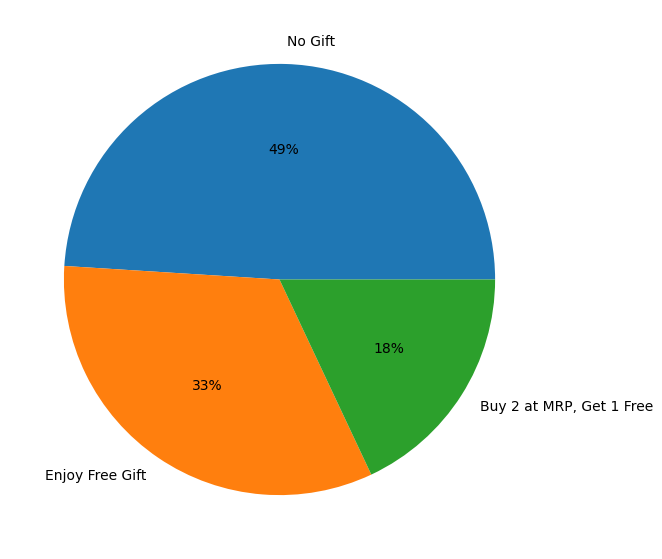

In [ ]:
g = df['Gift'].value_counts().head(8)
plt.figure(figsize = (7,7))
plt.pie(x = g, data = df,labels = g.index,autopct='%.0f%%')
plt.show()

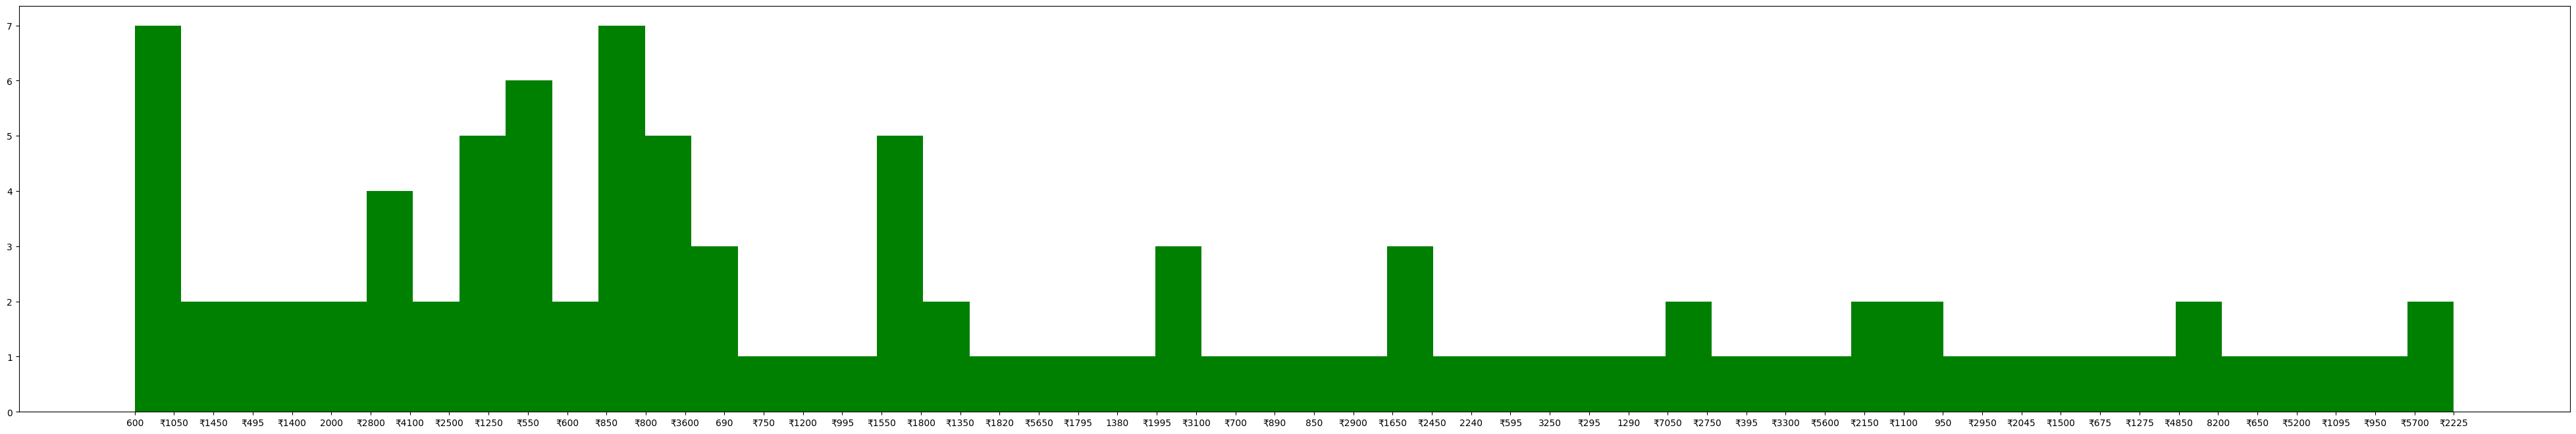

In [ ]:
plt.figure(figsize = (50,8))
plt.hist(data = df, x = 'Origional Price',bins=50, color = 'Green');


In [ ]:
df[['Origional Price','Offer Price']][:10].plot(kind='bar')

TypeError: ignored